In [1]:
import pandas as pd
import kaggle

import sys
sys.path.insert(0, '../src/')
import auto_co2 as co2
import importlib
importlib.reload(co2)

<module 'auto_co2' from 'd:\\0 PERSO\\00 LUDO\\Google Drive\\0 LUDO\\Projets\\Cours_info\\05 Projet Dts\\github\\car-co2-prediction_pre-release\\notebooks\\../src\\auto_co2\\__init__.py'>

In [3]:
#auth_file_path = ''
#df = co2.data.download_and_load_co2_data()
df = pd.read_csv('../data/sample/co2_raw_sample.csv')

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
0,50352413,DE,IP-08_ZAW_0090_01-W0V-1,STELLANTIS,OPEL AUTOMOBILE,OPEL AUTOMOBILE GMBH,nan,E8*2007/46*0264*20,Z-B,DA094DB12,BH1ZAWCABA5,OPEL,INSIGNIA SPORTS TOURER,M1,M1,1,1615.000,1747.000,nan,134.000,2829.000,1605.000,1608.000,DIESEL,M,1995.000,128.000,nan,E8 29 28,nan,2.000,nan,nan,P,2021,2021-12-22,5.100,nan
1,50854197,DE,IP-MQB37WZ_A0_0377-TMB-1,VW-SAIC,SKODA,SKODA AUTO AS,nan,E8*2007/46*0355*07,NX,ACDLAAX0,NFM6FM6AJ0254BIVL0N1A1A,SKODA,OCTAVIA,M1,M1,1,1313.000,1424.000,nan,120.000,2667.000,1531.000,1535.000,PETROL,M,999.000,81.000,nan,E8 28 29,nan,1.700,nan,nan,P,2021,2021-07-29,5.300,nan
2,47138966,IT,IP-03_330_0276-ZFA-1,STELLANTIS,FIAT GROUP,FCA ITALY SPA,nan,E3*2001/116*0217*68,199,LYU1A,EB5,FIAT,FIAT 500L,M1,M1,1,1475.000,1572.000,nan,126.000,2612.000,nan,nan,DIESEL,M,1248.000,70.000,nan,nan,nan,0.800,nan,nan,P,2021,2021-07-28,nan,nan
3,612992,ES,nan,VW-SAIC,SKODA,SKODA AUTO AS,nan,E8*2007/46*0272*20,NU,ACDTTCX1,NAD7AD7GC0054BI16N3C1A7A,SKODA,KAROQ,M1,M1,1,1601.000,nan,nan,148.000,2629.000,1576.000,1547.000,DIESEL,M,1968.000,110.000,nan,E8 29,nan,nan,nan,nan,P,2021,2021-11-15,5.700,nan
4,51428624,DE,IP-PQ12ZZZ_A2_0503-WVW-1,VW-SAIC,VOLKSWAGEN,VOLKSWAGEN AG,nan,E13*2007/46*1167*33,AA,ABEBMA,FA1FA1CZ0020GAVR0N1EVW1B15O,"VOLKSWAGEN, VW",UP!,M1,M1,1,1248.000,1330.000,0.000,0.000,2417.000,1408.000,1412.000,ELECTRIC,E,nan,61.000,127.000,nan,nan,nan,nan,nan,P,2021,2021-12-10,nan,nan


<class 'pandas.io.formats.style.Styler'>


,Column,Non-Null Count,Dtype
0,ID,5000 non-null,int64
1,Country,5000 non-null,object
2,VFN,4493 non-null,object
3,Mp,4838 non-null,object
4,Mh,5000 non-null,object
5,Man,5000 non-null,object
6,MMS,0 non-null,float64
7,Tan,4987 non-null,object
8,T,4999 non-null,object
9,Va,4989 non-null,object


<class 'pandas.io.formats.style.Styler'>


,Info
0,"RangeIndex: 5000 entries, 0 to 4999"
1,Data columns (total 38 columns):
2,37 Electric range (km) 727 non-null float64
3,"dtypes: float64(17), int64(3), object(18)"
4,memory usage: 1.4+ MB


<class 'pandas.io.formats.style.Styler'>


,Colonne,Valeurs manquantes (%)
0,Vf,100.00%
1,Ernedc (g/km),100.00%
2,De,100.00%
3,MMS,100.00%
4,Electric range (km),85.46%
5,z (Wh/km),84.24%
6,Enedc (g/km),76.20%
7,Erwltp (g/km),56.10%
8,IT,53.26%
9,Fuel consumption,40.68%


<class 'pandas.io.formats.style.Styler'>
Incomplete rows dropped:74
TOTAL NUMBER OF ROWS DROPPED:2900


,Column,Non-Null Count,Dtype
0,Pool,2100 non-null,object
1,MassRunningOrder,2100 non-null,float64
2,Co2EmissionsWltp,2100 non-null,float64
3,BaseWheel,2100 non-null,float64
4,FuelType,2100 non-null,object
5,EnginePower,2100 non-null,float64
6,InnovativeTechnology,2100 non-null,int32
7,ElectricRange,2100 non-null,float64


<class 'pandas.io.formats.style.Styler'>


,Info
0,"Index: 2100 entries, 0 to 4999"
1,Data columns (total 8 columns):
2,7 ElectricRange 2100 non-null float64
3,"dtypes: float64(5), int32(1), object(2)"
4,memory usage: 139.5+ KB


<class 'pandas.io.formats.style.Styler'>


,Colonne,count,mean,std,min,25%,50%,75%,max
0,MassRunningOrder,2100.000,1487.725,333.118,915.000,1245.000,1440.000,1665.500,2690.000
1,Co2EmissionsWltp,2100.000,113.590,57.076,0.000,111.000,126.000,142.000,373.000
2,BaseWheel,2100.000,2662.505,170.571,1873.000,2570.000,2647.000,2730.000,3498.000
3,EnginePower,2100.000,102.336,51.574,18.000,72.000,96.000,112.000,460.000
4,InnovativeTechnology,2100.000,0.557,0.497,0.000,0.000,1.000,1.000,1.000
5,ElectricRange,2100.000,28.058,93.180,0.000,0.000,0.000,0.000,614.000


<class 'pandas.io.formats.style.Styler'>


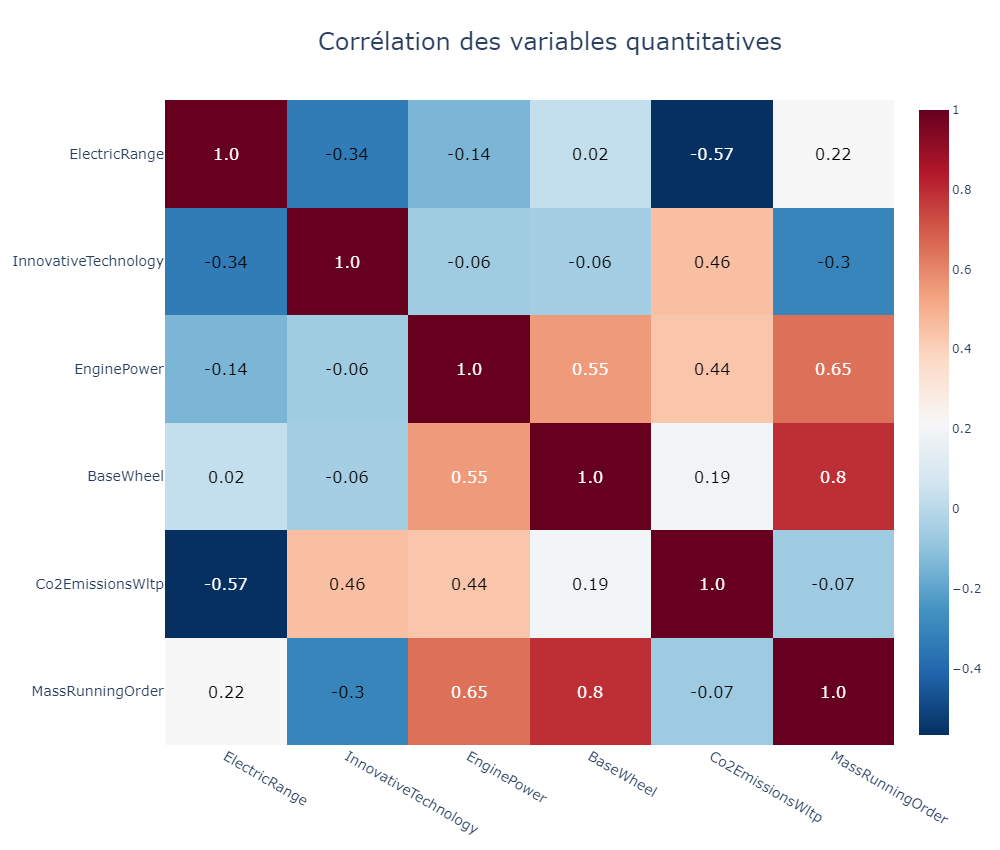

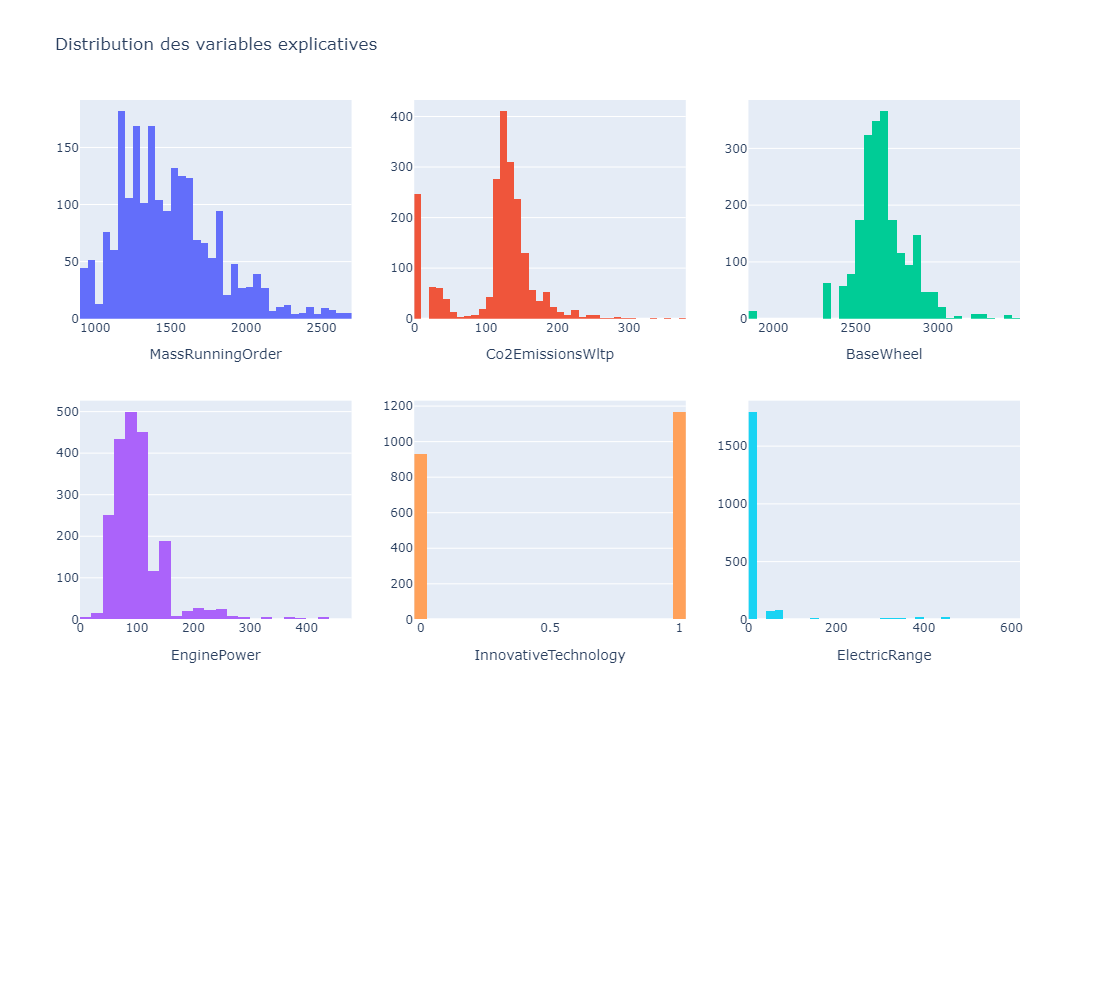

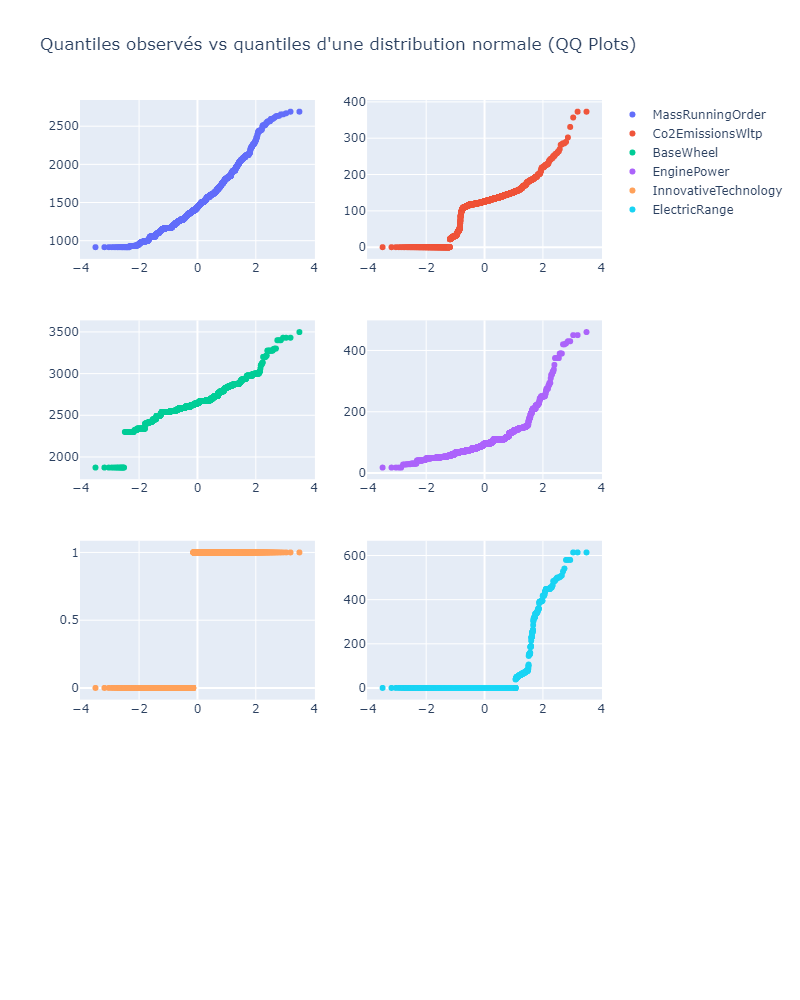

Data saved to ../data/processed/co2_classification_20240117-070038


In [6]:
# Inspection des données
co2.styles.displayer(df, title='APERCU DU JEU DE DONNEES', save=True)
co2.styles.display_info(df, title='DONNEES BRUTES', save=True) 
co2.styles.display_na(df, title='PART DE VALEURS MANQUANTES DANS LE JEU DE DONNEES', save=True)   

# Nettoyage des données
df = co2.data.ml_preprocess(df, countries=['FR', 'DE'],
                               rem_axlewidth=True,
                               rem_fuel_consumption=True,
                               rem_engine_capacity=True)


# Inspection des features
co2.styles.display_info(df, title='DONNEES NETTOYEES', save=True) 
co2.styles.display_describe(df, title='STATISTIQUES DESCRIPTIVES', save=True)

co2.viz.plot_correlation_heatmap(df, interactive=False, save=True)
co2.viz.plot_feature_distributions(df, interactive=False, save=True)
co2.viz.plot_qqplots(df, interactive=False, save=True)

# One-hot encoding des variables catégorielles
df = co2.data.discretize_electricrange(df) 
df = co2.data.dummify_all_categoricals(df)

# Sauvegarde du jeu de données prêt à l'emploi pour la régression
co2.data.save_processed_data(df, classification=True, pickle=False)